In [16]:
#! /usr/bin/env python
import time
import numpy as np
import scipy
import random
import matplotlib.pyplot as plt
import weave
get_ipython().magic(u'matplotlib inline')

%matplotlib inline

In [2]:
def mov_func(x,y,n):
    code = """
        unsigned long int i;
        for (i=0; i < n; i++) {
             *y = *x;
           x++;
           y++;
        }
    """
    weave.inline(code,['n','x','y'])

In [4]:
def mov_func(x,y,n):
    code = """
        unsigned long int i;
        for (i=0; i < n; i++) {
             *y = *x;
           x++;
           y++;
        }
    """
    weave.inline(code,['n','x','y'])

In [5]:
def rand_access(x,y,n):
    code = """
        unsigned long int i;
        srand(time(NULL));
        for (i=0; i < n; i++) {
            *y = *x + (rand() % n);
            y++;
        }
    """
    weave.inline(code,['n','x','y'])

In [6]:
def thousand_access(x,y,n):
    code = """
        unsigned long int i;
        for (i=0; i < n; i++) {
            *y = x[i%1000];
            y++;
        }
    """
    weave.inline(code,['n','x','y'])

In [7]:
def strided_access(x,y,n):
    code = """
        unsigned long int i;
        for (i=0; i < n; i++) {
            *y = x[(i*1000)%n];
            y++;
        }
    """
    weave.inline(code,['n','x','y'])

In [8]:
def spatial_access(x,y,n,offset=2):
    code = """
        unsigned long int i;
        unsigned long int j;
        for (i=0; i < n; i++) {
            for (j=0; j < offset; j++) {
                *y = x[(i+j)%n];
            }
            y++;
        }
    """
    weave.inline(code,['n','x','y','offset'])

In [9]:
def function_timing(test_function,offset=2):
    
    Max_N = 10000      # Set to 1000000
    # Run function once to iron out compile time
    x = np.arange(Max_N)/float(Max_N)
    y = np.empty(Max_N,dtype=np.double)
    n=1000
    if test_function == spatial_access:
        test_function(x,y,n,offset)
    else:
        test_function(x,y,n)
    
    # Build range of 10000 to 1000000, with 100 items
    # 10000, 20000, 30000, ..., 980000, 990000, 1000000
    num_range = np.linspace(Max_N/100,Max_N,100)
    times = []
    #print num_range

    # For each item in num_range, build new array, of the size of the item
    for N in num_range:
        
        # For each iteration of N, run the loop N times
        if test_function == spatial_access:
            start = time.time()
            for i in range(int(N)):
                test_function(x,y,n,offset)
            times.append(time.time()-start)
        else:
            start = time.time()
            for i in range(int(N)):
                test_function(x,y,n)
            times.append(time.time()-start)
        
        
    return num_range, times

In [10]:
def plt_times(num_range, times):
    f = plt.figure()
    ax = plt.subplot(111)
    
    
    regression = np.polyfit(num_range, times, 1)
    
    #ax.bar(num_range,times)
    
    r_x, r_y = zip(*((i, i*regression[0] + regression[1]) for i in range(10000)))

    plt.plot(r_x, r_y, color="red")
    
    plt.xlim(num_range[0],num_range[-1])
    ax.set_title('Time per Function Executions')
    ax.set_xlabel('Number of Function Executions')
    ax.set_ylabel('Time [sec]')
    f.show()

creating /tmp/weave-pi-9fqvvp/python27_intermediate/compiler_88c55a7ca067e85b2861e860084e4900


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


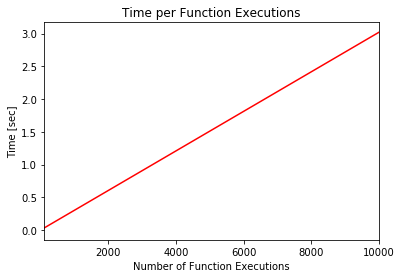

In [11]:
num_range, times = function_timing(rand_access)
plt_times(num_range, times)

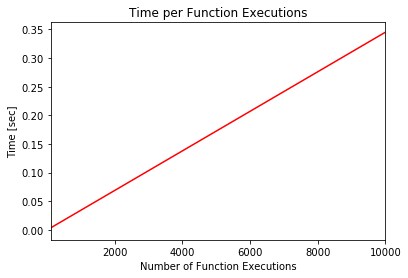

In [12]:
num_range, times = function_timing(thousand_access)
plt_times(num_range, times)

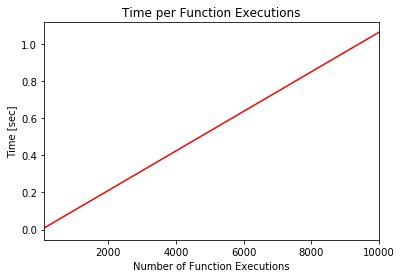

In [13]:
num_range, times = function_timing(strided_access)
plt_times(num_range, times)

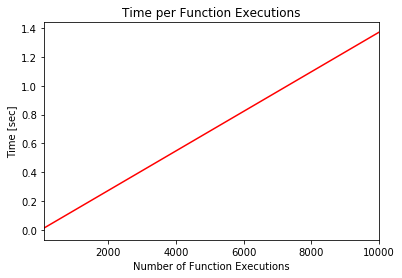

In [14]:
num_range, times = function_timing(spatial_access,3)
plt_times(num_range, times)

In [15]:
if __name__=='__main__':
    True